Script to calculate the histogram of vectorised buffer widths of natural water bodies and drainage ditches

In [1]:
import geopandas as gpd
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline

# R:\Evelyn\veekaitsevoondid\final files\KPO_JOON_5m\  R:\Evelyn\veekaitsevoondid\final files\MSR_JOON_5m\

In [2]:
#pip install pyarrow

## Natural water bodies

In [3]:
ndf1 = pd.read_parquet('KPO_JOON_5m_East.gzip')
ndf1.head()

,Rmed,Lmed
0,14,15
1,12,15
2,13,1
3,14,1
4,15,1


In [4]:
len(ndf1)

2870967

In [5]:
ndf2 = pd.read_parquet('KPO_JOON_5m_West.gzip')
len(ndf2)

2798598

In [6]:
ndf3 = pd.read_parquet('MSR_JOON_5m.gzip')
len(ndf3)

3219856

In [7]:
#concatenate two dataframes for natural water bodies
KPO_JOON_5m = pd.concat([ndf1, ndf2], axis=0, ignore_index=True).reset_index(drop=True)
len(KPO_JOON_5m)

5669565

In [8]:
#Concatenate Lmed and Rmed
# Extract the relevant parts of the columns
lmed_part = KPO_JOON_5m['Lmed']
rmed_part = KPO_JOON_5m['Rmed']

# Concatenate the two Series
natural_buff_width_series = pd.concat([lmed_part, rmed_part], ignore_index=True)

# Create a new DataFrame with the combined column
natural_buff_width_df = pd.DataFrame({'buff_width': natural_buff_width_series})
# add this as a new column to your original DataFrame:
#KPO_JOON_5m = pd.concat([KPO_JOON_5m, buff_width_df], axis=1)
natural_buff_width_df.head()

,buff_width
0,15
1,15
2,1
3,1
4,1


In [9]:
len(natural_buff_width_df)

11339130

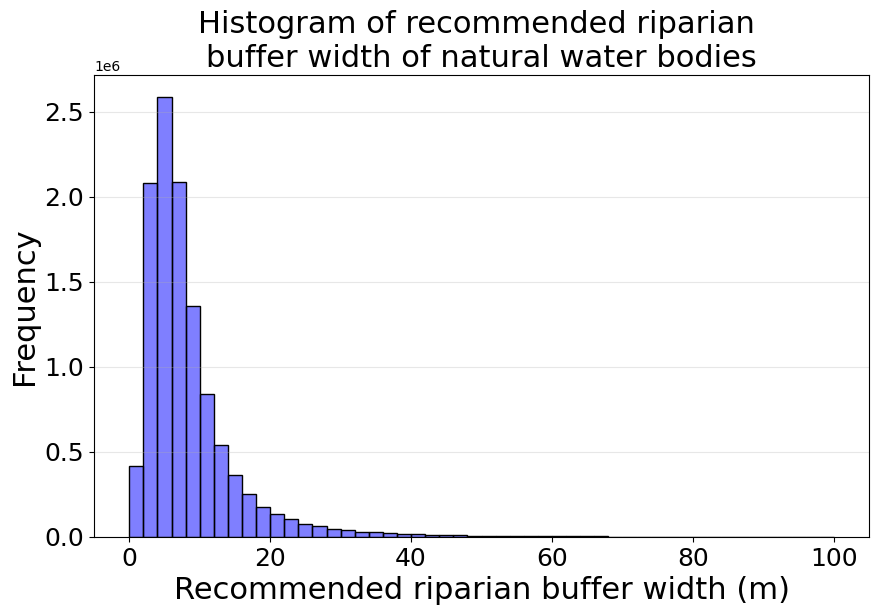

In [51]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(natural_buff_width_df, x='buff_width', kde=False, bins=50, color="blue", alpha=0.5)
            
# Add labels and title
plt.xlabel('Recommended riparian buffer width (m)', fontsize=22)  # Larger x-axis label
plt.ylabel('Frequency', fontsize=22)        # Larger y-axis label
plt.title('Histogram of recommended riparian \nbuffer width of natural water bodies', fontsize=22)

# Format the y-axis to show integers without scientific notation
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Increase tick label size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add grid for better readability (optional)
plt.grid(axis='y', alpha=0.3)

plt.savefig('histgram_natural_waterbodies_buff_width.png', transparent=False, dpi=300)
plt.show()

## Drainage ditches histogram

In [31]:
# drainage ditches
MSR_JOON_5m = ndf3

In [32]:
#Concatenate Lmed and Rmed
# Extract the relevant parts of the columns
d_lmed_part = MSR_JOON_5m['Lmed']
d_rmed_part = MSR_JOON_5m['Rmed']

# Concatenate the two Series
drain_buff_width_series = pd.concat([d_lmed_part, d_rmed_part], ignore_index=True)

# Create a new DataFrame with the combined column
drain_buff_width_df = pd.DataFrame({'buff_width': drain_buff_width_series})
# add this as a new column to your original DataFrame:
#KPO_JOON_5m = pd.concat([KPO_JOON_5m, buff_width_df], axis=1)
drain_buff_width_df.head()

,buff_width
0,1
1,2
2,2
3,2
4,2


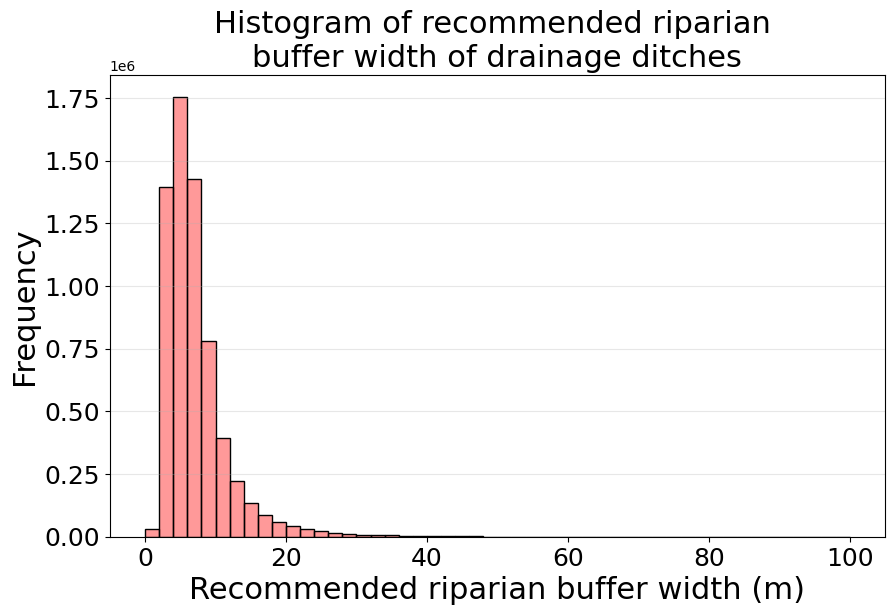

In [50]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(drain_buff_width_df, x='buff_width', kde=False, bins=50, color="red", alpha=0.4)
            
# Add labels and title
plt.xlabel('Recommended riparian buffer width (m)', fontsize=22)  # Larger x-axis label
plt.ylabel('Frequency', fontsize=22)        # Larger y-axis label
plt.title('Histogram of recommended riparian \nbuffer width of drainage ditches', fontsize=22)

# Format the y-axis to show integers without scientific notation
#plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Increase tick label size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add grid for better readability (optional)
plt.grid(axis='y', alpha=0.3)

plt.savefig('histgram_drainage_ditches_buff_width.png', transparent=False, dpi=300)
plt.show()

In [27]:
st3 = pd.DataFrame(MSR_JOON_5m['Rmed'].describe())
st3.rename(columns={'Rmed': 'MSR_JOON_5m_Rmed'}, inplace=True)

## Make quantiles

In [38]:
import pysal
import mapclassify as mc

ModuleNotFoundError: No module named 'pysal'

In [39]:
classifier = mc.Quantiles.make(k=5)

NameError: name 'mc' is not defined

In [34]:
q5a = mc.Quantiles(natural_buff_width_df['buff_width'],k=5)
display('Natural water bodies')
display(q5a)


'KPO_JOON_5m Rmed'

Quantiles                 

    Interval         Count
--------------------------
[  0.00,   3.00] | 1147577
(  3.00,   5.00] | 1211556
(  5.00,   8.00] | 1418220
(  8.00,  11.00] |  801938
( 11.00, 100.00] | 1090274

'KPO_JOON_5m Lmed'

Quantiles                 

    Interval         Count
--------------------------
[  0.00,   3.00] | 1348402
(  3.00,   5.00] | 1377067
(  5.00,   7.00] | 1068407
(  7.00,  10.00] |  838532
( 10.00, 100.00] | 1037157

'MSR_JOON_5m Rmed'

Quantiles                

    Interval        Count
-------------------------
[  0.00,   3.00] | 708527
(  3.00,   5.00] | 877141
(  5.00,   6.00] | 398265
(  6.00,   9.00] | 708956
(  9.00, 100.00] | 526967

'MSR_JOON_5m Lmed'

Quantiles                

    Interval        Count
-------------------------
[  0.00,   3.00] | 714243
(  3.00,   5.00] | 877918
(  5.00,   6.00] | 396094
(  6.00,   9.00] | 706554
(  9.00, 100.00] | 525047